In [ ]:
!pip install deplacy
!pip install pytrends
!python -m spacy download pt_core_news_sm
import pkg_resources,imp
imp.reload(pkg_resources)
import spacy
nlp=spacy.load("pt_core_news_sm")
doc=nlp("Eu quis amar, mas tive medo.")
import deplacy
deplacy.render(doc)
deplacy.serve(doc,port=None)

import pandas as pd
from pytrends.request import TrendReq
import numpy as np
import time
from dateutil import relativedelta
from datetime import datetime
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot

from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
term = 'home improvement'
now_time = datetime.now()
now = now_time.strftime("%Y-%m-%d")
three = now_time - relativedelta.relativedelta(years=3)
threey_ago = three.strftime("%Y-%m-%d") + " " + now
pytrends.build_payload([term], cat=0, timeframe= threey_ago, geo='', gprop='images')
moao = pytrends.interest_over_time()

moao = moao.dropna()
moao['date'] = moao.index
moao['date'] = pd.to_datetime(moao['date'])
moao['year'] = pd.DatetimeIndex(moao['date']).year
moao['month'] = pd.DatetimeIndex(moao['date']).month
moao['day'] = pd.DatetimeIndex(moao['date']).day
maxyear = moao['year'].max()
grouped = moao.groupby(['year']).mean()

m = Prophet(changepoint_range=0.90, 
            #n_changepoints = 1, 
            yearly_seasonality=True, 
            changepoint_prior_scale=0.1)
m.add_country_holidays(country_name='US')
m.add_seasonality('quarterly', period=91.25, fourier_order=10, mode='additive')
df = moao[['date',term]]
df.columns = ['ds', 'y']
m.fit(df);
forecast = m.predict(df)
m.plot_components(forecast);
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

container = pd.DataFrame({'month': np.arange(1,13,1)})
importance = []

for term in ['money', 'meeting', 'innovation', 'people', 'growth', 'goal', 'future',
       'question', 'road', 'strategy', 'discussion', 'digital', 'data',
       'success', 'target', 'team', 'collaboration', 'teamwork', 'change',
       'technology', 'car', 'business', 'vision', 'agile', 'mountain', 'bank',
       'workshop', 'abstract', 'journey', 'finance', 'nature', 'travel',
       'customer', 'steps', 'next steps', 'handshake', 'food', 'work',
       'energy', 'office', 'oil', 'challenge', 'process', 'retail',
       'questions', 'construction', 'value', 'amp', 'objective', 'computer',
       'christmas', 'presentation', 'plan', 'agenda']:
  now_time = datetime.now()
  now = now_time.strftime("%Y-%m-%d")
  three = now_time - relativedelta.relativedelta(years=3)
  threey_ago = three.strftime("%Y-%m-%d") + " " + now
  pytrends.build_payload([term], cat=0, timeframe= threey_ago, geo='', gprop='images')
  moao = pytrends.interest_over_time()

  moao = moao.dropna()
  moao['date'] = moao.index
  moao['date'] = pd.to_datetime(moao['date'])
  moao['year'] = pd.DatetimeIndex(moao['date']).year
  moao['month'] = pd.DatetimeIndex(moao['date']).month
  moao['day'] = pd.DatetimeIndex(moao['date']).day
  maxyear = moao['year'].max()
  grouped = moao.groupby(['year']).mean()

  m = Prophet(changepoint_range=0.90, 
              #n_changepoints = 1, 
              yearly_seasonality=True, 
              changepoint_prior_scale=0.1)
  m.add_country_holidays(country_name='US')
  #m.add_seasonality('quarterly', period=91.25, fourier_order=10, mode='additive')
  df = moao[['date',term]]
  df.columns = ['ds', 'y']
  m.fit(df);
  forecast = m.predict(df)
  #m.plot_components(forecast);

  forecast['month'] = pd.DatetimeIndex(forecast['ds']).month
  fm = pd.DataFrame(forecast[forecast['yearly'] > forecast['yearly'].mean()].groupby('month').count()['ds'])
  #forecast[forecast['yearly'] > forecast['yearly'].mean() + forecast['yearly'].std()].groupby('month').count()['ds']
  fm = fm[fm['ds']>10]
  one = pd.DataFrame({term: term, 'month': fm.index.tolist() })
  container = pd.merge(container, one, on = 'month', how = 'left')
  importance.append(forecast['trend'].mean())

In [ ]:
container

,month,money,meeting,innovation,people,growth,goal,future,question,road,strategy,discussion,digital,data,success,target,team,collaboration,teamwork,change,technology,car,business,vision,agile,mountain,bank,workshop,abstract,journey,finance,nature,travel,customer,steps,next steps,handshake,food,work,energy,office,oil,challenge,process,retail,questions,construction,value,amp,objective,computer,christmas,presentation,plan,agenda
0,1,money,NaN,NaN,NaN,NaN,goal,future,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,car,NaN,vision,NaN,mountain,bank,NaN,NaN,NaN,finance,NaN,travel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,challenge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,agenda
1,2,money,NaN,innovation,people,growth,NaN,future,question,road,strategy,discussion,digital,data,NaN,NaN,team,NaN,NaN,NaN,technology,car,business,vision,agile,mountain,bank,workshop,abstract,NaN,finance,NaN,NaN,customer,steps,next steps,NaN,food,work,energy,NaN,oil,NaN,process,retail,questions,construction,value,NaN,objective,computer,NaN,presentation,plan,NaN
2,3,money,meeting,NaN,people,NaN,NaN,future,question,NaN,strategy,discussion,NaN,data,NaN,NaN,NaN,NaN,NaN,change,NaN,car,NaN,NaN,NaN,NaN,NaN,NaN,abstract,NaN,NaN,nature,NaN,customer,steps,NaN,handshake,NaN,work,energy,NaN,NaN,challenge,process,NaN,questions,construction,NaN,amp,NaN,NaN,NaN,NaN,plan,NaN
3,4,money,meeting,NaN,people,growth,NaN,NaN,question,NaN,strategy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,teamwork,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nature,NaN,NaN,steps,next steps,NaN,NaN,NaN,energy,NaN,oil,challenge,NaN,NaN,questions,NaN,NaN,amp,NaN,NaN,NaN,NaN,plan,NaN
4,5,NaN,NaN,NaN,NaN,NaN,NaN,future,NaN,road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,collaboration,NaN,NaN,NaN,NaN,NaN,vision,NaN,NaN,NaN,NaN,NaN,journey,NaN,NaN,NaN,NaN,NaN,NaN,handshake,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,amp,NaN,NaN,NaN,NaN,NaN,NaN
5,6,NaN,NaN,NaN,NaN,NaN,goal,NaN,NaN,road,NaN,NaN,NaN,NaN,NaN,NaN,team,NaN,NaN,NaN,NaN,NaN,NaN,NaN,agile,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,handshake,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,road,NaN,NaN,NaN,NaN,success,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,travel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,road,NaN,NaN,NaN,NaN,success,NaN,NaN,NaN,NaN,NaN,NaN,car,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,travel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,agenda
8,9,money,meeting,innovation,people,growth,goal,future,question,road,strategy,discussion,digital,data,success,NaN,team,collaboration,teamwork,change,technology,car,business,vision,agile,mountain,NaN,workshop,abstract,NaN,finance,nature,travel,NaN,steps,NaN,handshake,food,work,energy,office,NaN,NaN,process,NaN,questions,construction,value,NaN,objective,computer,NaN,presentation,plan,agenda
9,10,NaN,meeting,innovation,people,growth,NaN,future,question,NaN,strategy,discussion,digital,data,success,target,NaN,collaboration,teamwork,change,technology,NaN,business,NaN,NaN,NaN,bank,NaN,abstract,journey,finance,NaN,NaN,customer,steps,NaN,NaN,food,work,energy,office,NaN,NaN,process,retail,questions,construction,value,NaN,objective,computer,NaN,presentation,plan,NaN


In [ ]:
ip = pd.DataFrame({'term_importance': importance}, index = ['money', 'meeting', 'innovation', 'people', 'growth', 'goal', 'future',
       'question', 'road', 'strategy', 'discussion', 'digital', 'data',
       'success', 'target', 'team', 'collaboration', 'teamwork', 'change',
       'technology', 'car', 'business', 'vision', 'agile', 'mountain', 'bank',
       'workshop', 'abstract', 'journey', 'finance', 'nature', 'travel',
       'customer', 'steps', 'next steps', 'handshake', 'food', 'work',
       'energy', 'office', 'oil', 'challenge', 'process', 'retail',
       'questions', 'construction', 'value', 'amp', 'objective', 'computer',
       'christmas', 'presentation', 'plan', 'agenda']).sort_values('term_importance', ascending = False)

In [ ]:
ip

,term_importance
car,91.071577
bank,89.247437
road,86.791849
mountain,85.358158
abstract,85.164105
journey,84.583389
nature,84.368625
digital,84.234920
plan,84.095925
people,83.707043


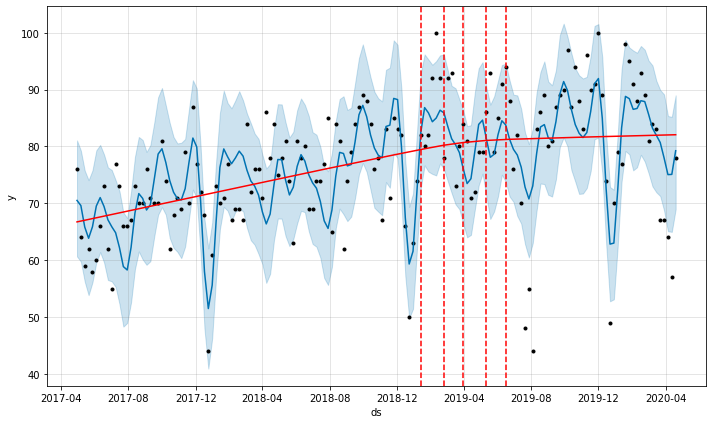

In [ ]:
#from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

In [ ]:
container = pd.DataFrame({'month': np.arange(1,13,1)})
forecast['month'] = pd.DatetimeIndex(forecast['ds']).month
fm = pd.DataFrame(forecast[forecast['yearly'] > forecast['yearly'].mean()].groupby('month').count()['ds'])
#forecast[forecast['yearly'] > forecast['yearly'].mean() + forecast['yearly'].std()].groupby('month').count()['ds']
fm = fm[fm['ds']>10]
one = pd.DataFrame({term: term, 'month': fm.index.tolist() })
container = pd.merge(container, one, on = 'month', how = 'left')
container

,month,coffee,discussion_x,success,road,discussion,data,mountain,workshop,bank,journey,customer
0,1,1.0,NaN,1.0,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN
1,2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0
2,3,NaN,1.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN
5,6,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN
9,10,1.0,1.0,1.0,NaN,1.0,1.0,NaN,NaN,1.0,1.0,1.0


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


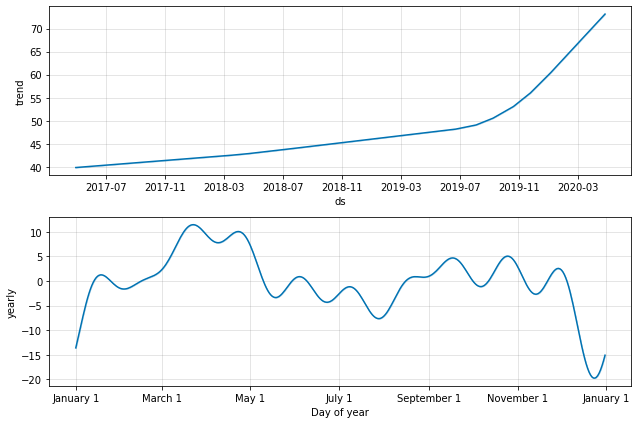

In [ ]:
from fbprophet import Prophet

m = Prophet(changepoint_range=0.90, 
            #n_changepoints = 1, 
            yearly_seasonality=True, 
            changepoint_prior_scale=0.1)
#m.add_seasonality('quarterly', period=91.25, fourier_order=10, mode='additive')
df = moao[['date','healthcare']]
df.columns = ['ds', 'y']
m.fit(df);
forecast = m.predict(df)
m.plot_components(forecast);

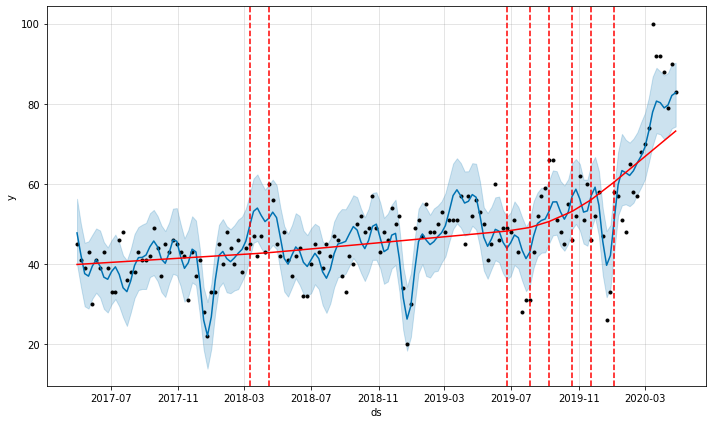

In [ ]:
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

In [ ]:
forecast['yearly'].std()

6.150348397734557

In [ ]:
forecast['year'] = pd.DatetimeIndex(forecast['ds']).year
forecast.groupby(['year']).mean()['yearly']

year
2017   -1.762450
2018    0.039748
2019    0.045494
2020    3.717995
Name: yearly, dtype: float64

In [ ]:
m.changepoints.iloc[0]

Timestamp('2019-12-29 00:00:00')

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


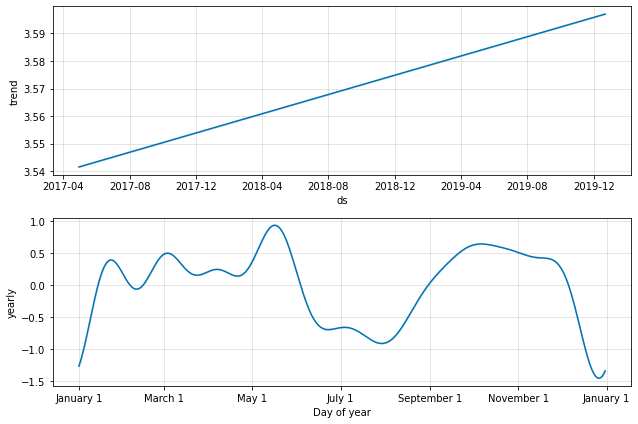

In [ ]:
from fbprophet import Prophet


m2 = Prophet(changepoint_range=0.90, interval_width=0.95)
#m.add_seasonality('quarterly', period=91.25, fourier_order=10, mode='additive')
kk = df[df['ds'] < m.changepoints.iloc[0]]
m2.fit(kk);
forecast = m2.predict(kk)
m2.plot_components(forecast);

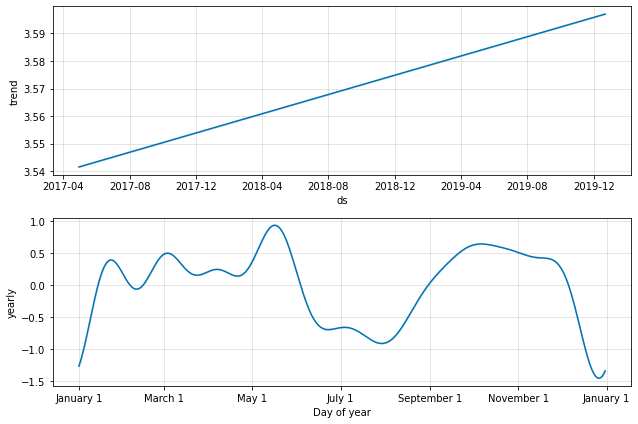

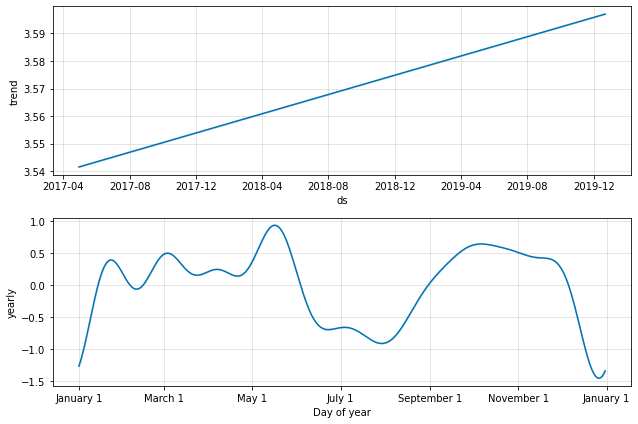

In [ ]:
m2.plot_components(forecast)

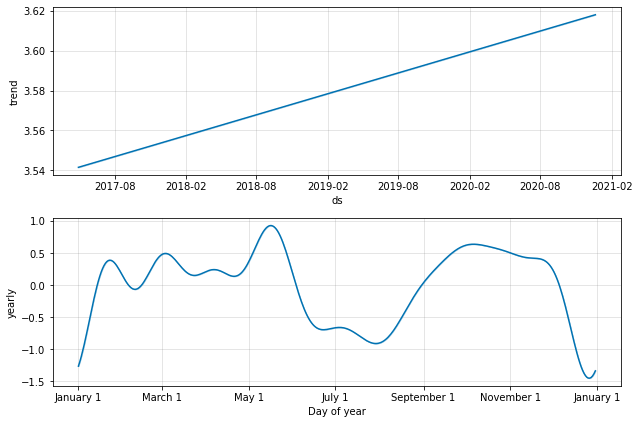

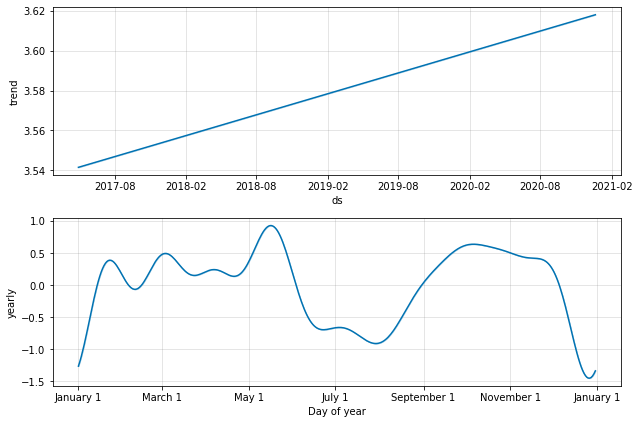

In [ ]:
futured = m2.make_future_dataframe(periods=365)
forecadst = m2.predict(futured)
m2.plot_components(forecadst)

#days = (pd.date_range(start='2017-01-01', periods=365) + pd.Timedelta(days=0))
#seas = m2.predict_seasonal_components(futured)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


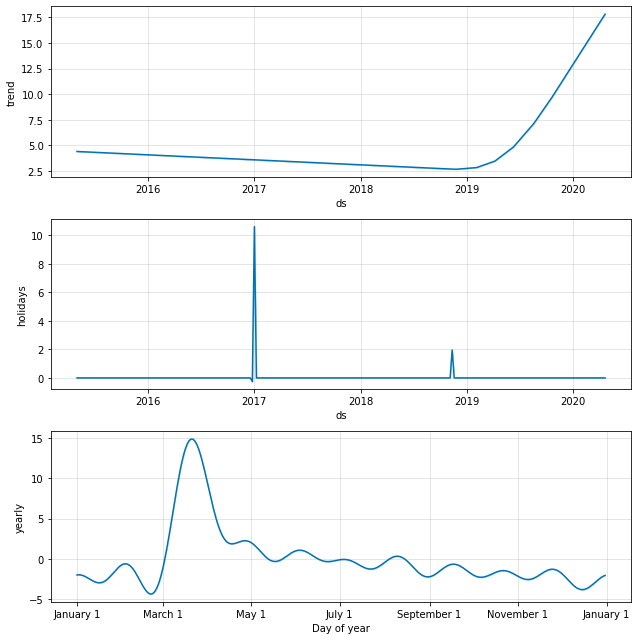

In [ ]:
search_t = 'work from home'
pytrends.build_payload([search_t], cat=0, timeframe='today 5-y', geo='US', gprop='images')
moao = pytrends.interest_over_time()
moao = moao.dropna()
moao['date'] = moao.index
moao['date'] = pd.to_datetime(moao['date'])

m = Prophet(changepoint_range=0.90, interval_width=0.95)
df = moao[['date', search_t]]
df.columns = ['ds', 'y']
m.add_country_holidays(country_name='US')
m.fit(df);
forecast = m.predict(df)
m.plot_components(forecast);

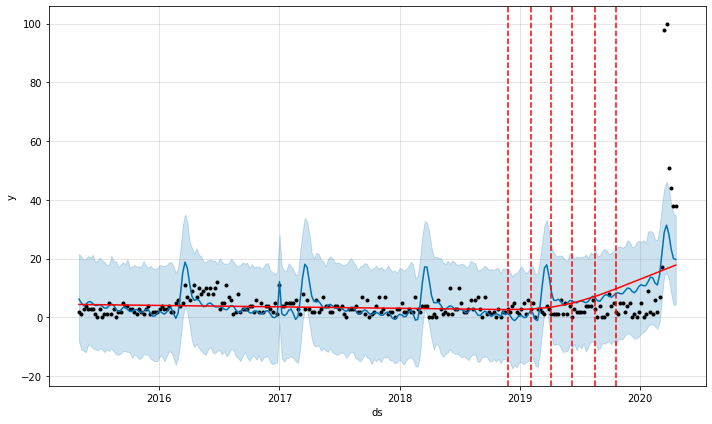

In [ ]:
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

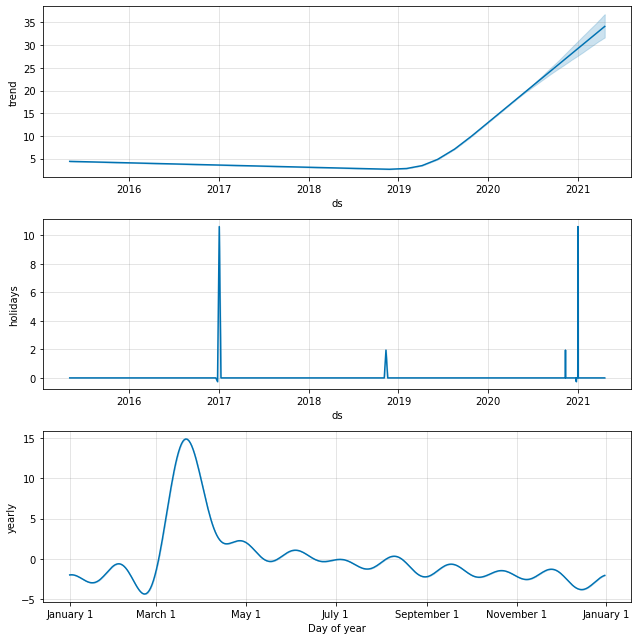

In [ ]:
future = m.make_future_dataframe(periods=366)
forecast = m.predict(future)
m.plot_components(forecast);

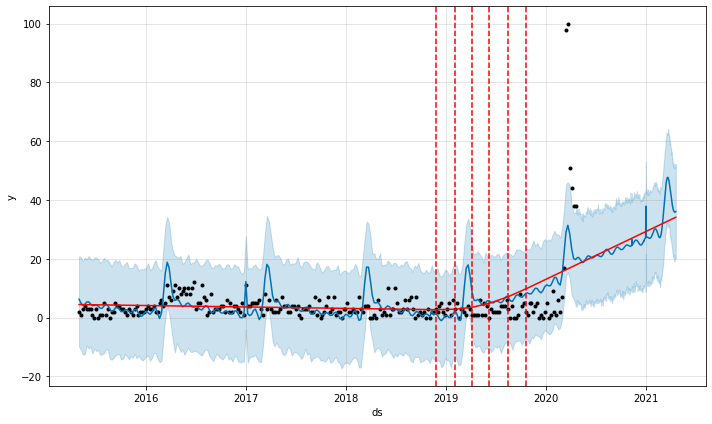

In [ ]:
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)